In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [4]:
l = os.listdir("./im")

In [5]:
l

['IMG_20200331_112038996.jpg',
 'IMG_20200331_111305225.jpg',
 'IMG_20200331_111259004.jpg',
 'IMG_20200331_111023333.jpg',
 'IMG_20200331_111817980.jpg',
 'IMG_20200331_111550983.jpg',
 'IMG_20200331_111011156.jpg',
 'IMG_20200331_111905775.jpg',
 'IMG_20200331_112034544.jpg',
 'IMG_20200331_110924458.jpg',
 'IMG_20200331_111508371.jpg',
 'IMG_20200331_111422354.jpg',
 'IMG_20200331_110918221.jpg',
 'IMG_20200331_111950775.jpg',
 'IMG_20200331_111542521.jpg',
 'IMG_20200331_111232747.jpg',
 'IMG_20200331_111355510.jpg',
 'IMG_20200331_112150223.jpg',
 'IMG_20200331_112142032.jpg',
 'IMG_20200331_112214558.jpg',
 'IMG_20200331_111930835.jpg',
 'IMG_20200331_112116156.jpg',
 'IMG_20200331_112020643.jpg',
 'IMG_20200331_111235794.jpg',
 'IMG_20200331_112032031.jpg',
 'IMG_20200331_111225669.jpg',
 'IMG_20200331_111434493.jpg',
 'IMG_20200331_111149670.jpg',
 'IMG_20200331_111344043.jpg',
 'IMG_20200331_110952520.jpg',
 'IMG_20200331_111829291.jpg',
 'IMG_20200331_111826293.jpg',
 'IMG_20

In [500]:
image = Image.open(f'./im/{l[26]}')
image = image.convert('L')
image = np.array(image)

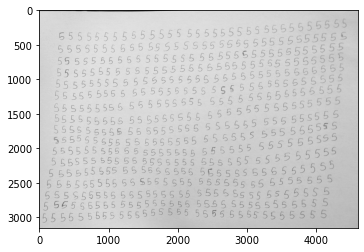

In [503]:
plt.imshow(image, cmap='gray')

In [502]:
image = image[:3150]

In [7]:
len(image[0])

4608

In [49]:
image = np.rot90(image)

In [504]:
n = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]

In [505]:
thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)[1]

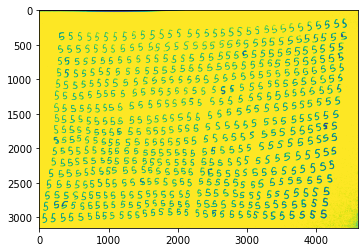

In [506]:
plt.imshow(n)

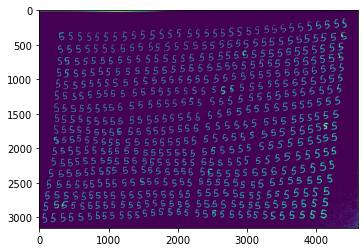

In [507]:
plt.imshow(thresh)

In [508]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [509]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
pi = []
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if w + h > 100:
        print(x, y, w, h)
        pi.append(n[y:y+h, x:x+w])

172 2940 65 125
54 2940 62 134
316 2936 67 123
566 2935 74 107
433 2932 61 119
708 2931 57 101
1026 2922 62 99
923 2919 57 104
821 2914 57 106
3346 2913 69 114
1863 2913 63 52
1397 2913 52 94
1167 2912 54 103
3479 2911 67 121
3093 2909 80 101
1284 2909 54 105
3763 2903 78 110
3235 2903 65 111
2886 2902 59 106
3622 2901 70 119
2617 2898 59 98
3007 2897 56 101
2755 2897 62 104
3915 2894 84 120
2374 2892 64 107
2502 2888 62 97
4067 2886 89 125
1502 2886 57 102
2266 2884 48 105
2104 2878 49 96
1620 2876 56 100
1993 2871 55 86
1732 2866 71 95
1873 2865 40 63
602 2782 51 102
713 2774 58 99
60 2774 70 124
3128 2773 68 102
1297 2773 60 82
461 2773 70 97
1417 2772 55 95
936 2772 61 98
3021 2771 62 93
3262 2770 69 92
2900 2768 64 90
1047 2768 53 92
818 2767 58 103
3510 2766 65 97
2011 2763 53 86
326 2762 91 105
220 2759 68 105
3657 2758 73 108
1885 2756 62 84
1176 2755 71 100
2116 2754 58 97
2483 2752 90 92
2781 2750 64 97
2634 2750 64 115
1536 2750 51 99
1764 2748 59 86
2388 2747 75 106
2285 27

In [510]:
len(pi)

567

In [28]:
a

0

In [172]:
pi = pi[:-50]

In [157]:
a = a - 1

In [512]:
pi.pop(-1)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [266]:
b = -8

In [275]:
b +=1

In [329]:
a=0

In [ ]:
plt.imshow(pi[-2])
b-=1
a+=1

In [479]:
y_true = np.full(len(pi), 2)

In [480]:
p = pi.copy()
for i in range(len(p)):
    if p[i].shape[0] > p[i].shape[1]:
        zero = np.full((p[i].shape[0], int((p[i].shape[0] - p[i].shape[1])/2)), 255)
        p[i] = np.concatenate((zero, p[i]), axis=1)
        p[i] = np.concatenate((p[i], zero), axis=1)
    else:
        zero = np.full((int((p[i].shape[1] - p[i].shape[0])/2), p[i].shape[1]), 255)
        p[i] = np.concatenate((zero, p[i]), axis=0)
        p[i] = np.concatenate((p[i], zero), axis=0)

In [481]:
p[-1].shape

(77, 76)

In [482]:
res = []
for ps in p:
    res.append(cv2.resize(ps, dsize=(45, 45), interpolation= cv2.INTER_NEAREST))
res2 = res.copy()

In [483]:
from keras.models import load_model

In [484]:
m = load_model("second_model.h5")

In [485]:
for i in range(len(res)):
    res[i] = res[i]/255
res = np.array(res)
res = res.reshape(len(res), 45, 45, 1)

In [486]:
m.predict_classes(res)

array([7, 7, 7, 7, 7, 2, 7, 2, 7, 2, 7, 7, 7, 2, 7, 2, 7, 2, 2, 7, 7, 7,
       2, 7, 7, 7, 7, 2, 7, 2, 7, 2, 2, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 2, 7, 7, 7, 7, 2, 2, 7, 7, 2, 8, 2, 7, 2, 7, 7, 4, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 7, 7, 7, 7, 2, 7, 2, 7, 2, 2, 7, 2,
       7, 2, 7, 7, 7, 2, 2, 7, 7, 7, 7, 2, 7, 2, 2, 7, 7, 7, 2, 2, 7, 7,
       7, 2, 7, 2, 7, 7, 7, 7, 2, 2, 7, 7, 7, 7, 2, 7, 7, 2, 7, 7, 7, 7,
       7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 2, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 2, 7, 7, 2, 7, 2, 2, 7, 8, 7, 7,
       7, 7, 7, 7, 2, 2, 2, 7, 7, 7, 2, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7,
       7, 7, 7, 2, 4, 2, 2, 2, 7, 7, 2, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 2, 7, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 7, 7, 6, 7, 7, 7,
       7, 7, 2, 2, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 2, 2, 7, 7, 7, 7, 2, 7,
       7, 2, 7, 7, 7, 7, 2, 7, 2, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 2, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [487]:
y_true

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [488]:
b = 0

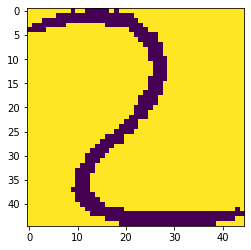

In [489]:
plt.imshow(res2[240])
b += 1

In [490]:
from sklearn.metrics import accuracy_score

In [491]:
accuracy_score(y_true, m.predict_classes(res))

0.2146690518783542

In [492]:
rot = 0

In [493]:
for i in res2:
    im = Image.fromarray(i)
    im.save(f'2/2_2my2img2_{rot}.png')
    rot +=1

In [464]:
res2[5].shape

(45, 45)

In [465]:
rot

474

In [206]:
image2 = res2.copy()

In [207]:
image2

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=int32),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=int32),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=int32),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [208]:
for i in range(len(image2)):
    image2[i] = np.rot90(image2[i])
    image2[i] = np.rot90(image2[i])

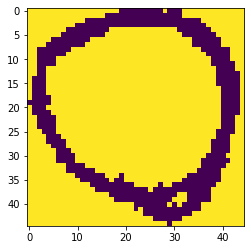

In [211]:
plt.imshow(image2[150])

In [212]:
for i in image2:
    im = Image.fromarray(i)
    im.save(f'parenc/)_my2img_{rot}.png')
    rot +=1